In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from helper_functions_realdata import *

In [2]:
def rename(df):
    df['modelname_old'] = df['modelname']
    df['modelname'] = df['modelname'].replace('least_squares', 'K-means: Least squares \n(sign-flipped eigenvectors)')
    df['modelname'] = df['modelname'].replace('diametrical', 'K-means: Diametrical')
    df['modelname'] = df['modelname'].replace('complex_diametrical', 'K-means: Complex diametrical')
    df['modelname'] = df['modelname'].replace('grassmann', 'K-means: Grassmann')
    df['modelname'] = df['modelname'].replace('weighted_grassmann', 'K-means: Weighted Grassmann')
    df['modelname'] = df['modelname'].replace('Watson', 'Mixture: Watson')
    df['modelname'] = df['modelname'].replace('Complex_Watson', 'Mixture: Complex Watson')
    df['modelname'] = df['modelname'].replace('ACG', 'Mixture: ACG')
    df['modelname'] = df['modelname'].replace('Complex_ACG', 'Mixture: Complex ACG')
    df['modelname'] = df['modelname'].replace('MACG', 'Mixture: MACG')
    df['modelname'] = df['modelname'].replace('SingularWishart', 'Mixture: Singular Wishart')
    df['modelname'] = df['modelname'].replace('Normal', 'Mixture: Gaussian')
    df['modelname'] = df['modelname'].replace('Complex_Normal', 'Mixture: Complex Gaussian')
    df['Set'] = df['Set'].replace('train', 'Train')
    df['Set'] = df['Set'].replace('test1', 'Within-subject test')
    df['Set'] = df['Set'].replace('test2', 'Out-of-sample test')
    # if column LR doesnt exist, make it with zeros
    if 'LR' not in df.columns:
        df['LR'] = 0
    if 'HMM' not in df.columns:
        df['HMM'] = False

    names = [] #without the Kmeans or Mixture or HMM
    names2 = [] #with
    for i in range(len(df)):
        if 'Watson' in df['modelname'].iloc[i]:
            add_rank = ''
        else:
            add_rank = ' rank='+str(df['rank'].iloc[i])
        if df['HMM'].iloc[i]:
            add_HMM = 'HMM: '
        else:
            add_HMM = ''
        if 'Mixture' in df['modelname'].iloc[i]:
            names.append(df['modelname'].iloc[i][8:]+add_rank)
            if df['HMM'].iloc[i]:
                names2.append(add_HMM + df['modelname'].iloc[i][8:]+add_rank)
            else:
                names2.append(add_HMM + df['modelname'].iloc[i]+add_rank)
        else:
            names.append(df['modelname'].iloc[i][:8])
            names2.append(df['modelname'].iloc[i])
            
    df['names'] = names
    df['names2'] = names2
    df['Accuracy'] = df['classification_accuracy']
    return df

In [3]:
#model order loglik data
df2MOTORSOCIAL = pd.DataFrame()
modelnames = ['Complex_Watson','Normal','MACG','SingularWishart','Watson','ACG','least_squares','diametrical','complex_diametrical','grassmann','weighted_grassmann','Complex_ACG','Complex_Normal']
for modelname in modelnames:
    for rank in [1,10,25,50]:
        if modelname in ['Complex_Watson','Watson','least_squares','diametrical','complex_diametrical','grassmann','weighted_grassmann'] and rank != 25:
            continue
        df = pd.read_csv('../data/results/116_results/MOTORSOCIALmodelorder_realdata_'+modelname+'_K=2_rank='+str(rank)+'.csv')
        df2MOTORSOCIAL = pd.concat([df2MOTORSOCIAL,df])
df2MOTORSOCIAL = rename(df2MOTORSOCIAL)

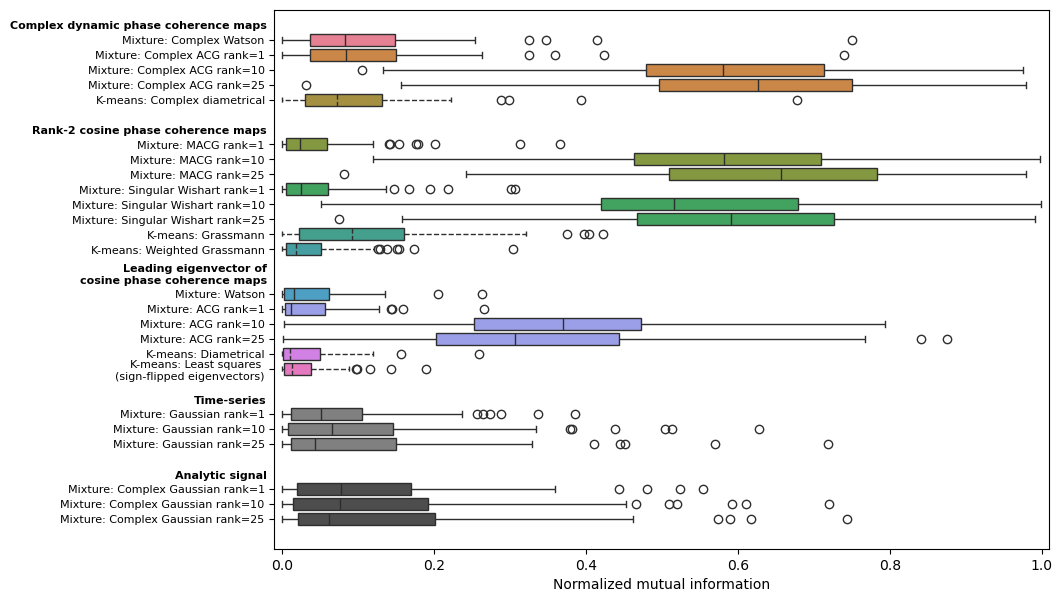

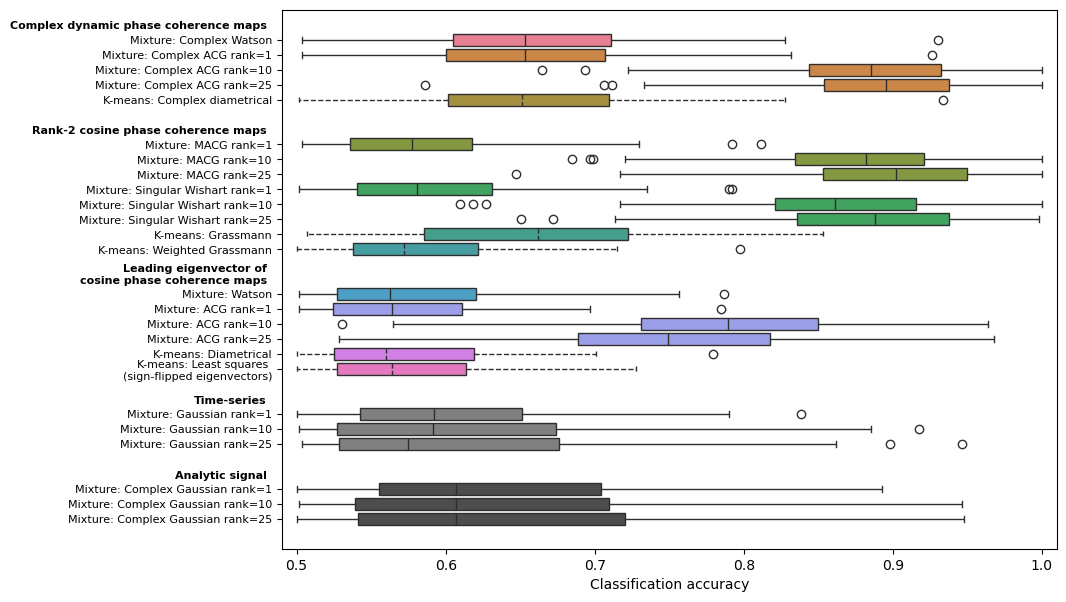

In [4]:
horizontal_boxplot(df2MOTORSOCIAL[df2MOTORSOCIAL['Set']=='Out-of-sample test'],'figures/motorsocial.png',type=1)
horizontal_boxplot(df2MOTORSOCIAL[df2MOTORSOCIAL['Set']=='Out-of-sample test'],'figures/motorsocial_acc.png',type=2)

In [5]:
#model order loglik data
df2MOTORSOCIALnoGSR = pd.DataFrame()
modelnames = ['Complex_Watson','Normal','MACG','SingularWishart','Watson','ACG','least_squares','diametrical','complex_diametrical','grassmann','weighted_grassmann','Complex_ACG','Complex_Normal']
for modelname in modelnames:
    for rank in [1,10,25]:
        if modelname in ['Complex_Watson','Watson','least_squares','diametrical','complex_diametrical','grassmann','weighted_grassmann'] and rank != 25:
            continue
        df = pd.read_csv('../data/results/116_results/MOTORSOCIALmodelorder_realdata_'+modelname+'_K=2_rank='+str(rank)+'_noGSR.csv')
        df2MOTORSOCIALnoGSR = pd.concat([df2MOTORSOCIALnoGSR,df])
df2MOTORSOCIALnoGSR = rename(df2MOTORSOCIALnoGSR)

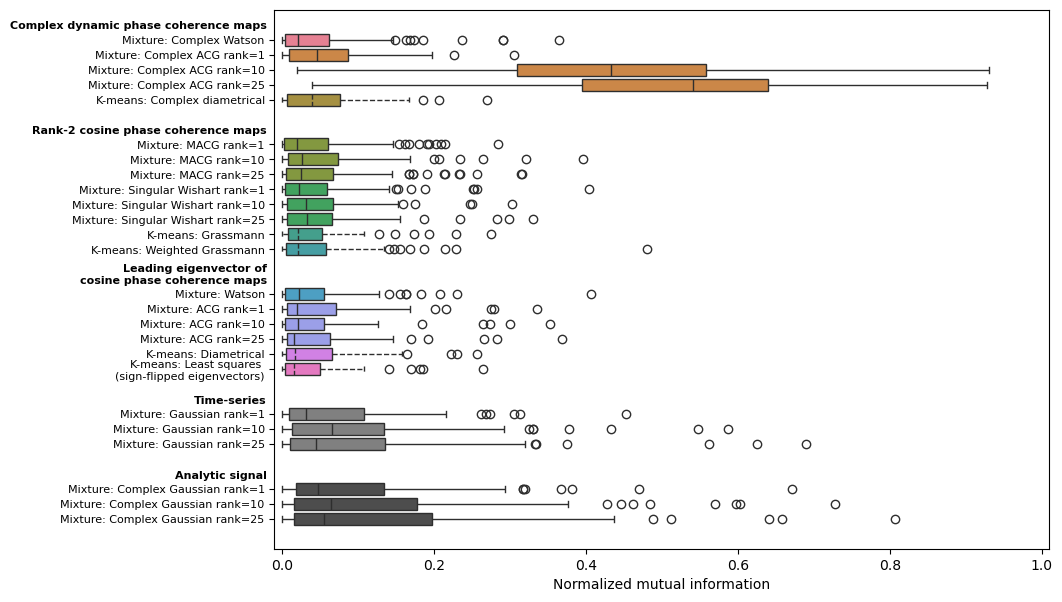

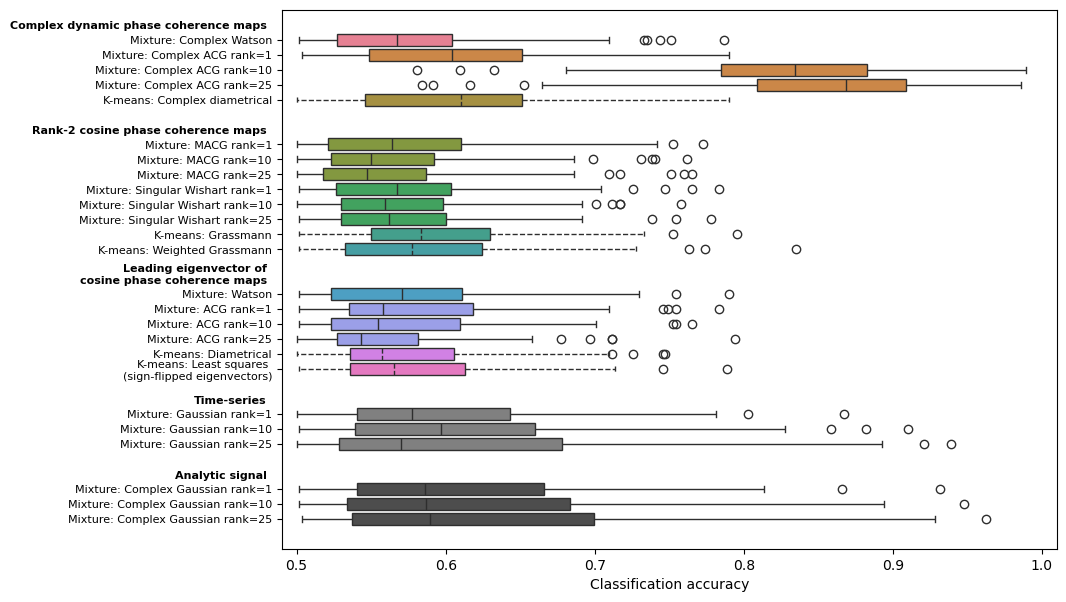

In [6]:
horizontal_boxplot(df2MOTORSOCIALnoGSR[df2MOTORSOCIALnoGSR['Set']=='Out-of-sample test'],'figures/motorsocial_noGSR.png',type=1)
horizontal_boxplot(df2MOTORSOCIALnoGSR[df2MOTORSOCIALnoGSR['Set']=='Out-of-sample test'],'figures/motorsocial_noGSR_acc.png',type=2)

In [7]:
#model order loglik data
df2MOTORSOCIAL_subjectspecific = pd.DataFrame()
modelnames = ['Complex_Watson','MACG','SingularWishart','Watson','ACG','least_squares','diametrical','complex_diametrical','grassmann','weighted_grassmann','Complex_ACG']#,'Complex_Normal','Normal'
for modelname in modelnames:
    for rank in [1,10,25]:
        if modelname in ['Complex_Watson','Watson','least_squares','diametrical','complex_diametrical','grassmann','weighted_grassmann'] and rank != 25:
            continue
        df = pd.read_csv('../data/results/116_results/MOTORSOCIALmodelorder_realdata_subjectspecific_'+modelname+'_K=2_rank='+str(rank)+'.csv')
        df2MOTORSOCIAL_subjectspecific = pd.concat([df2MOTORSOCIAL_subjectspecific,df])
df2MOTORSOCIAL_subjectspecific = rename(df2MOTORSOCIAL_subjectspecific)

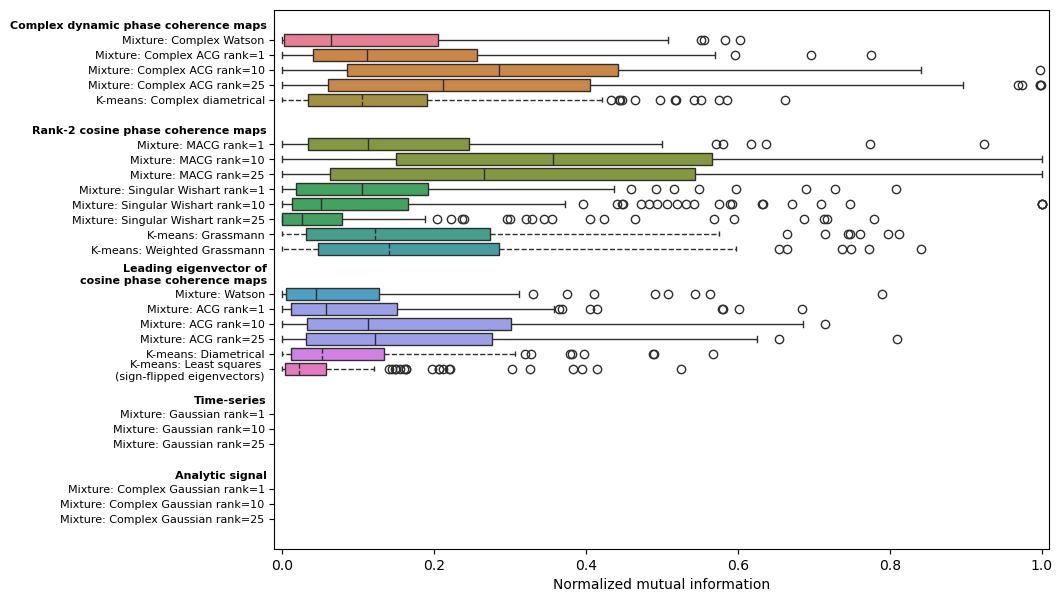

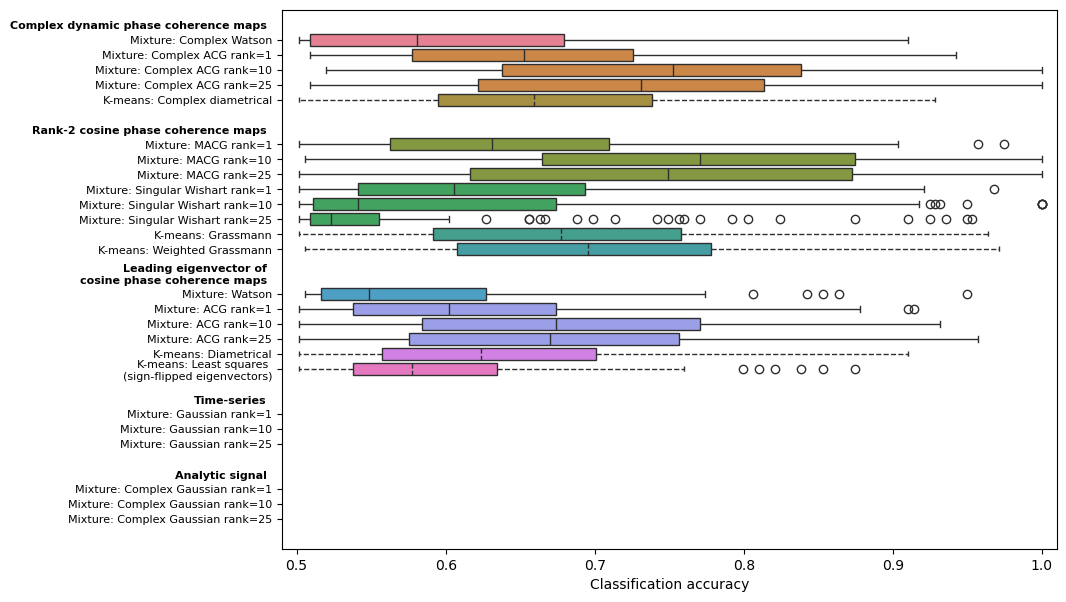

In [8]:
horizontal_boxplot(df2MOTORSOCIAL_subjectspecific[df2MOTORSOCIAL_subjectspecific['Set']=='Within-subject test'],'figures/motorsocial_subjectspecific.png',type=1)
horizontal_boxplot(df2MOTORSOCIAL_subjectspecific[df2MOTORSOCIAL_subjectspecific['Set']=='Within-subject test'],'figures/motorsocial_subjectspecific_acc.png',type=2)

/tmp/ipykernel_162241/2137983398.py:12: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.boxplot(y='names2', x='classification_accuracy', data=df_tmp, palette=palette_reduced, dodge=False, width=0.5,order=order)


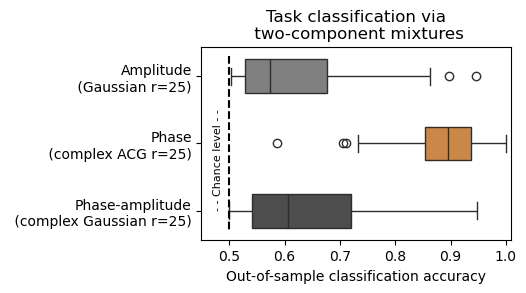

In [9]:
palette_husl = sns.color_palette("husl", n_colors=11, desat=1)
palette_reduced = [(0.5,0.5,0.5),palette_husl[1],(0.3,0.3,0.3),(0,0,0)]

fig = plt.figure(figsize=(4,2.5))
df_tmp = df2MOTORSOCIAL[df2MOTORSOCIAL['names2'].isin(['Mixture: Complex ACG rank=25','Mixture: Gaussian rank=25','Mixture: Complex Gaussian rank=25'])]
df_tmp = df_tmp[df_tmp['Set'] == 'Out-of-sample test']
df_tmp['names2'] = df_tmp['names2'].replace('Mixture: Complex ACG rank=25','Phase\n (complex ACG r=25)')
df_tmp['names2'] = df_tmp['names2'].replace('Mixture: Complex Gaussian rank=25','Phase-amplitude\n (complex Gaussian r=25)')
df_tmp['names2'] = df_tmp['names2'].replace('Mixture: Gaussian rank=25','Amplitude\n (Gaussian r=25)')
# order = ['Gaussian','Complex ACG','Complex Gaussian']
order = ['Amplitude\n (Gaussian r=25)','Phase\n (complex ACG r=25)','Phase-amplitude\n (complex Gaussian r=25)']
sns.boxplot(y='names2', x='classification_accuracy', data=df_tmp, palette=palette_reduced, dodge=False, width=0.5,order=order)
plt.vlines([0.5],ymin=-0.3,ymax=2.3, color='k', linestyle='--', linewidth=1.5)
plt.xlim(0.45,1.01)
plt.text(0.48, 2, '- - Chance level - -', ha='center', va='bottom', fontsize=8, rotation=90)
# vertical text

# plt.xticks(rotation=45, ha='right')
plt.ylabel('')
plt.xlabel('Out-of-sample classification accuracy')
plt.title('Task classification via\n two-component mixtures')
plt.savefig('figures/motorsocial_threemodels_acc.png', bbox_inches='tight', dpi=300)

In [10]:
# palette_husl = sns.color_palette("husl", n_colors=11, desat=1)
# palette_reduced = [(0.5,0.5,0.5),palette_husl[1],(0.3,0.3,0.3),(0,0,0)]

# fig = plt.figure(figsize=(6,4))
# df_tmp = df2MOTORSOCIAL[df2MOTORSOCIAL['names2'].isin(['Mixture: Complex ACG rank=25','Mixture: Gaussian rank=25','Mixture: Complex Gaussian rank=25'])]
# df_tmp = df_tmp[df_tmp['Set'] == 'Out-of-sample test']
# df_tmp['names2'] = df_tmp['names2'].replace('Mixture: Complex ACG rank=25','Phase\n (complex ACG r=25)')
# df_tmp['names2'] = df_tmp['names2'].replace('Mixture: Complex Gaussian rank=25','Phase-amplitude\n (complex Gaussian r=25)')
# df_tmp['names2'] = df_tmp['names2'].replace('Mixture: Gaussian rank=25','Amplitude\n (Gaussian r=25)')
# # order = ['Gaussian','Complex ACG','Complex Gaussian']
# order = ['Amplitude\n (Gaussian r=25)','Phase\n (complex ACG r=25)','Phase-amplitude\n (complex Gaussian r=25)']
# sns.boxplot(x='names2', y='classification_accuracy', data=df_tmp, palette=palette_reduced, dodge=False, width=0.5,order=order)
# plt.hlines([0.5],xmin=-0.3,xmax=2.3, color='k', linestyle='--', linewidth=1.5)
# plt.ylim(0.45,1.01)
# plt.text(1, 0.47, '- - Chance level - -', ha='center', va='bottom', fontsize=8)
# # plt.xticks(rotation=45, ha='right')
# plt.xlabel('')
# plt.ylabel('Out-of-sample classification accuracy')
# plt.title('Task classification via\n two-component mixtures')
# plt.savefig('figures/motorsocial_threemodels_acc_v2.png', bbox_inches='tight', dpi=300)

In [11]:
df1 = pd.read_csv('../data/results/116_results/MOTORSOCIALrank_realdata_Complex_ACG_K=1.csv')
df2 = pd.read_csv('../data/results/116_results/MOTORSOCIALrank_realdata_Complex_Normal_K=1.csv')
df3 = pd.read_csv('../data/results/116_results/MOTORSOCIALrank_realdata_Normal_K=1.csv')
df_rank = pd.concat([df1,df2,df3])
# df_rank = df1
df_rank = rename(df_rank)
df_rank = df_rank[df_rank['inner']==0]

In [12]:
#model order loglik data
df3 = pd.DataFrame()
modelnames = ['Normal','Complex_ACG','Complex_Normal']
for modelname in modelnames:
    for rank in [1,10,25,50,100]:
        for K in range(1,6):
            df = pd.read_csv('../data/results/116_results/MOTORSOCIALmodelorder_realdata_'+modelname+'_K='+str(K)+'_rank='+str(rank)+'.csv')
            df3 = pd.concat([df3,df])
df3 = rename(df3)
df4 = df3[df3['Set']=='Out-of-sample test']

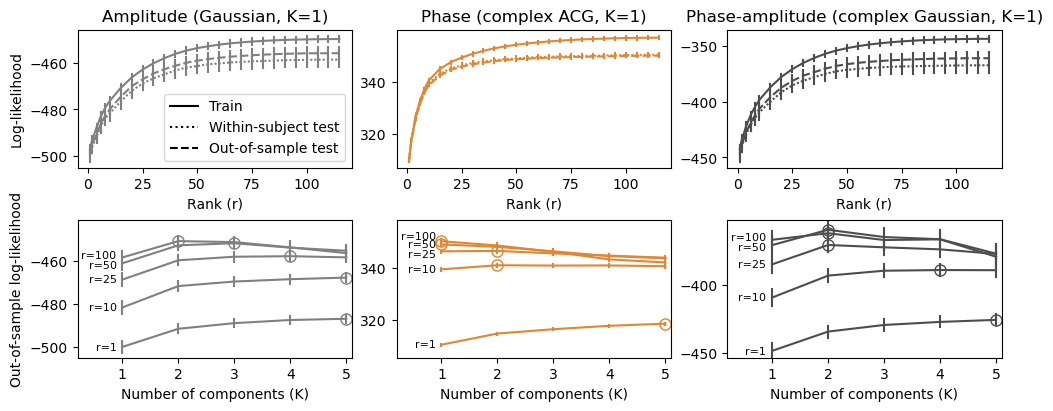

In [13]:
df_rank['modelname'] = df_rank['modelname'].replace('Complex_ACG','Mixture: Complex ACG')
df_rank['modelname'] = df_rank['modelname'].replace('Complex_Normal','Mixture: Complex Gaussian')
df_rank['modelname'] = df_rank['modelname'].replace('Normal','Mixture: Gaussian')
df_rank['Model'] = df_rank['modelname']
order2 = ['Mixture: Gaussian','Mixture: Complex ACG','Mixture: Complex Gaussian']
fig,axs = plt.subplots(2, 3, figsize=(10, 4),layout='constrained')
for i,model in enumerate(order2):
    sns.lineplot(x='rank', y='loglik', data=df_rank[df_rank['Model']==model],style='Set',hue='Model', palette=[palette_reduced[i]], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=axs[0,i])
    if i==0:
        axs[0,i].set_ylabel('Log-likelihood')
        axs[0,i].legend([plt.plot([],color='black')[0], plt.plot([],color='black',linestyle=':')[0], plt.plot([],color='black',linestyle='--')[0]], 
           ['Train', 'Within-subject test', 'Out-of-sample test'],loc='lower right')
    else:
        axs[0,i].set_ylabel('')
    axs[0,i].set_xlabel('Rank (r)')
    if i==0:
        axs[0,i].set_title('Amplitude (Gaussian, K=1)')
    if i==1:
        axs[0,i].set_title('Phase (complex ACG, K=1)')
    if i==2:
        axs[0,i].set_title('Phase-amplitude (complex Gaussian, K=1)')

    for r in [1,10,25,50,100]:
        df_tmp = df4[df4['names2']==model+' rank='+str(r)]
        #choose only columns K and loglik
        df_tmp = df_tmp[['K','loglik','modelname']]
        sns.lineplot(x='K',y='loglik',data=df_tmp,hue='modelname', palette=[palette_reduced[i]], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=axs[1,i])
        
        df_avg = df_tmp.groupby(['K','modelname']).mean().reset_index()
        maxidx = df_avg['loglik'].argmax()
        axs[1,i].plot(df_avg['K'].iloc[maxidx],df_avg['loglik'].iloc[maxidx],'o',color=palette_reduced[i],fillstyle='none',markersize=8,markeredgewidth=1)
        # axs[1,i].text(0.5, 0.95, 'Rank = '+str(r), fontsize=8)
    if i==0:
        axs[1,i].set_ylabel('Out-of-sample log-likelihood')
    else:
        axs[1,i].set_ylabel('')
    axs[1,i].set_xlim(0.2,5.1)
    axs[1,i].set_ylim(np.mean(df4[(df4['names2']==model+' rank=1')&(df4['K']==1)]['loglik'])-5, np.mean(df4[(df4['names2']==model+' rank=100')&(df4['K']==2)]['loglik'])+10)
    axs[1,i].set_xlabel('Number of components (K)')
# sns.lineplot(x='K',y='loglik',data=df3[df3['names2']=='Mixture: Gaussian rank=1'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=axs[1,0])
# sns.lineplot(x='K',y='loglik',data=df3[df3['names2']=='Mixture: Gaussian rank=10'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=axs[1,0])
# sns.lineplot(x='K',y='loglik',data=df3[df3['names2']=='Mixture: Gaussian rank=25'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=axs[1,0])
# sns.lineplot(x='K',y='loglik',data=df3[df3['names2']=='Mixture: Gaussian rank=50'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=axs[1,0])

xpos = 0.90
axs[1,0].text(xpos, df4[(df4['names2']=='Mixture: Gaussian rank=1')&(df4['K']==1)]['loglik'].mean(), 'r=1', fontsize=8,ha='right',va='center');
axs[1,0].text(xpos, df4[(df4['names2']=='Mixture: Gaussian rank=10')&(df4['K']==1)]['loglik'].mean(), 'r=10', fontsize=8,ha='right',va='center');
axs[1,0].text(xpos, df4[(df4['names2']=='Mixture: Gaussian rank=25')&(df4['K']==1)]['loglik'].mean(), 'r=25', fontsize=8,ha='right',va='center');
axs[1,0].text(xpos, -1+df4[(df4['names2']=='Mixture: Gaussian rank=50')&(df4['K']==1)]['loglik'].mean(), 'r=50', fontsize=8,ha='right',va='center');
axs[1,0].text(xpos, +1+df4[(df4['names2']=='Mixture: Gaussian rank=100')&(df4['K']==1)]['loglik'].mean(), 'r=100', fontsize=8,ha='right',va='center');

axs[1,1].text(xpos, df4[(df4['names2']=='Mixture: Complex ACG rank=1')&(df4['K']==1)]['loglik'].mean(), 'r=1', fontsize=8,ha='right',va='center');
axs[1,1].text(xpos, df4[(df4['names2']=='Mixture: Complex ACG rank=10')&(df4['K']==1)]['loglik'].mean(), 'r=10', fontsize=8,ha='right',va='center');
axs[1,1].text(xpos, -1+df4[(df4['names2']=='Mixture: Complex ACG rank=25')&(df4['K']==1)]['loglik'].mean(), 'r=25', fontsize=8,ha='right',va='center');
axs[1,1].text(xpos, -0+df4[(df4['names2']=='Mixture: Complex ACG rank=50')&(df4['K']==1)]['loglik'].mean(), 'r=50', fontsize=8,ha='right',va='center');
axs[1,1].text(xpos, +2+df4[(df4['names2']=='Mixture: Complex ACG rank=100')&(df4['K']==1)]['loglik'].mean(), 'r=100', fontsize=8,ha='right',va='center');

axs[1,2].text(xpos, df4[(df4['names2']=='Mixture: Complex Gaussian rank=1')&(df4['K']==1)]['loglik'].mean(), 'r=1', fontsize=8,ha='right',va='center');
axs[1,2].text(xpos, df4[(df4['names2']=='Mixture: Complex Gaussian rank=10')&(df4['K']==1)]['loglik'].mean(), 'r=10', fontsize=8,ha='right',va='center');
axs[1,2].text(xpos, df4[(df4['names2']=='Mixture: Complex Gaussian rank=25')&(df4['K']==1)]['loglik'].mean(), 'r=25', fontsize=8,ha='right',va='center');
axs[1,2].text(xpos, -1.5+df4[(df4['names2']=='Mixture: Complex Gaussian rank=50')&(df4['K']==1)]['loglik'].mean(), 'r=50', fontsize=8,ha='right',va='center');
axs[1,2].text(xpos, +1.5+df4[(df4['names2']=='Mixture: Complex Gaussian rank=100')&(df4['K']==1)]['loglik'].mean(), 'r=100', fontsize=8,ha='right',va='center');
fig.savefig('figures/motor_social_curves.png', dpi=300)

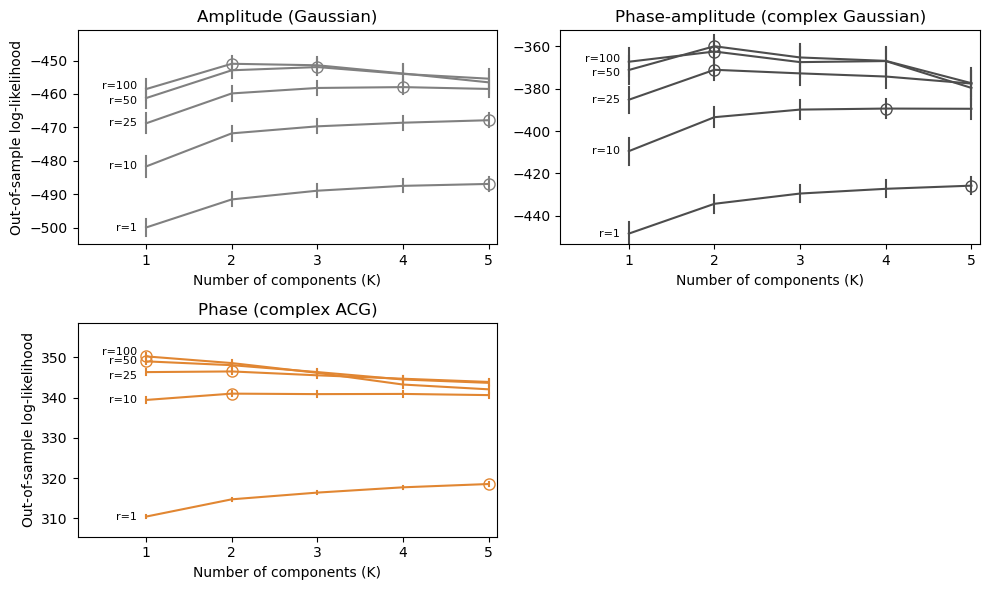

In [20]:
order2 = ['Mixture: Gaussian','Mixture: Complex Gaussian','Mixture: Complex ACG']
palette_reduced2 = [palette_reduced[0],palette_reduced[2],palette_reduced[1]]
fig,axs = plt.subplots(2, 2, figsize=(10, 6),layout='tight')
for i,model in enumerate(order2):
    ax = axs.flatten()[i]
    for r in [1,10,25,50,100]:
        df_tmp = df4[df4['names2']==model+' rank='+str(r)]
        #choose only columns K and loglik
        df_tmp = df_tmp[['K','loglik','modelname']]
        sns.lineplot(x='K',y='loglik',data=df_tmp,hue='modelname', palette=[palette_reduced2[i]], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=ax)
        
        df_avg = df_tmp.groupby(['K','modelname']).mean().reset_index()
        maxidx = df_avg['loglik'].argmax()
        ax.plot(df_avg['K'].iloc[maxidx],df_avg['loglik'].iloc[maxidx],'o',color=palette_reduced2[i],fillstyle='none',markersize=8,markeredgewidth=1)
        # axs[1,i].text(0.5, 0.95, 'Rank = '+str(r), fontsize=8)
    if i==0 or i==2:
        ax.set_ylabel('Out-of-sample log-likelihood')
    else:
        ax.set_ylabel('')
    if i==0:
        ax.set_title('Amplitude (Gaussian)')
    if i==2:
        ax.set_title('Phase (complex ACG)')
    if i==1:
        ax.set_title('Phase-amplitude (complex Gaussian)')
    ax.set_xlim(0.2,5.1)
    ax.set_ylim(np.mean(df4[(df4['names2']==model+' rank=1')&(df4['K']==1)]['loglik'])-5, np.mean(df4[(df4['names2']==model+' rank=100')&(df4['K']==2)]['loglik'])+10)
    ax.set_xlabel('Number of components (K)')
axs[1,1].axis('off')
# sns.lineplot(x='K',y='loglik',data=df3[df3['names2']=='Mixture: Gaussian rank=1'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=axs[1,0])
# sns.lineplot(x='K',y='loglik',data=df3[df3['names2']=='Mixture: Gaussian rank=10'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=axs[1,0])
# sns.lineplot(x='K',y='loglik',data=df3[df3['names2']=='Mixture: Gaussian rank=25'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=axs[1,0])
# sns.lineplot(x='K',y='loglik',data=df3[df3['names2']=='Mixture: Gaussian rank=50'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=axs[1,0])

xpos = 0.90
axs[0,0].text(xpos, df4[(df4['names2']=='Mixture: Gaussian rank=1')&(df4['K']==1)]['loglik'].mean(), 'r=1', fontsize=8,ha='right',va='center');
axs[0,0].text(xpos, df4[(df4['names2']=='Mixture: Gaussian rank=10')&(df4['K']==1)]['loglik'].mean(), 'r=10', fontsize=8,ha='right',va='center');
axs[0,0].text(xpos, df4[(df4['names2']=='Mixture: Gaussian rank=25')&(df4['K']==1)]['loglik'].mean(), 'r=25', fontsize=8,ha='right',va='center');
axs[0,0].text(xpos, -1+df4[(df4['names2']=='Mixture: Gaussian rank=50')&(df4['K']==1)]['loglik'].mean(), 'r=50', fontsize=8,ha='right',va='center');
axs[0,0].text(xpos, +1+df4[(df4['names2']=='Mixture: Gaussian rank=100')&(df4['K']==1)]['loglik'].mean(), 'r=100', fontsize=8,ha='right',va='center');

axs[1,0].text(xpos, df4[(df4['names2']=='Mixture: Complex ACG rank=1')&(df4['K']==1)]['loglik'].mean(), 'r=1', fontsize=8,ha='right',va='center');
axs[1,0].text(xpos, df4[(df4['names2']=='Mixture: Complex ACG rank=10')&(df4['K']==1)]['loglik'].mean(), 'r=10', fontsize=8,ha='right',va='center');
axs[1,0].text(xpos, -1+df4[(df4['names2']=='Mixture: Complex ACG rank=25')&(df4['K']==1)]['loglik'].mean(), 'r=25', fontsize=8,ha='right',va='center');
axs[1,0].text(xpos, -0+df4[(df4['names2']=='Mixture: Complex ACG rank=50')&(df4['K']==1)]['loglik'].mean(), 'r=50', fontsize=8,ha='right',va='center');
axs[1,0].text(xpos, +1+df4[(df4['names2']=='Mixture: Complex ACG rank=100')&(df4['K']==1)]['loglik'].mean(), 'r=100', fontsize=8,ha='right',va='center');

axs[0,1].text(xpos, df4[(df4['names2']=='Mixture: Complex Gaussian rank=1')&(df4['K']==1)]['loglik'].mean(), 'r=1', fontsize=8,ha='right',va='center');
axs[0,1].text(xpos, df4[(df4['names2']=='Mixture: Complex Gaussian rank=10')&(df4['K']==1)]['loglik'].mean(), 'r=10', fontsize=8,ha='right',va='center');
axs[0,1].text(xpos, df4[(df4['names2']=='Mixture: Complex Gaussian rank=25')&(df4['K']==1)]['loglik'].mean(), 'r=25', fontsize=8,ha='right',va='center');
axs[0,1].text(xpos, -1.5+df4[(df4['names2']=='Mixture: Complex Gaussian rank=50')&(df4['K']==1)]['loglik'].mean(), 'r=50', fontsize=8,ha='right',va='center');
axs[0,1].text(xpos, +1.5+df4[(df4['names2']=='Mixture: Complex Gaussian rank=100')&(df4['K']==1)]['loglik'].mean(), 'r=100', fontsize=8,ha='right',va='center');
fig.savefig('figures/motor_social_curves_v2.png', dpi=300)

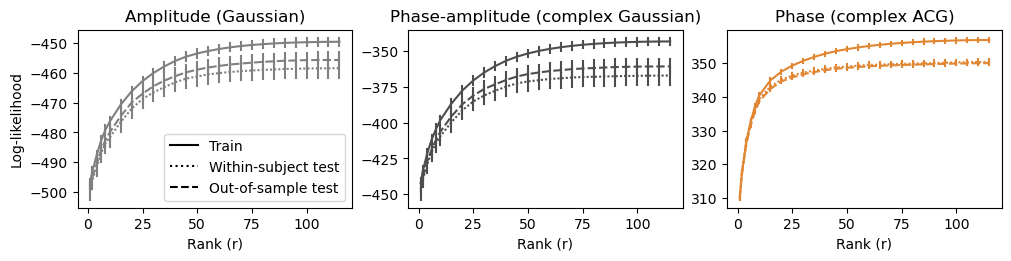

In [15]:
df_rank['modelname'] = df_rank['modelname'].replace('Complex_ACG','Mixture: Complex ACG')
df_rank['modelname'] = df_rank['modelname'].replace('Complex_Normal','Mixture: Complex Gaussian')
df_rank['modelname'] = df_rank['modelname'].replace('Normal','Mixture: Gaussian')
df_rank['Model'] = df_rank['modelname']
order2 = ['Mixture: Gaussian','Mixture: Complex Gaussian','Mixture: Complex ACG']
palette_reduced2 = [palette_reduced[0],palette_reduced[2],palette_reduced[1]]
fig,axs = plt.subplots(1, 3, figsize=(10, 2.5),layout='constrained')
for i,model in enumerate(order2):
    sns.lineplot(x='rank', y='loglik', data=df_rank[df_rank['Model']==model],style='Set',hue='Model', palette=[palette_reduced2[i]], linewidth=1.5,err_style='bars',errorbar='se',legend=False,ax=axs[i])
    if i==0:
        axs[i].set_ylabel('Log-likelihood')
        axs[i].legend([plt.plot([],color='black')[0], plt.plot([],color='black',linestyle=':')[0], plt.plot([],color='black',linestyle='--')[0]], 
           ['Train', 'Within-subject test', 'Out-of-sample test'],loc='lower right')
    else:
        axs[i].set_ylabel('')
    axs[i].set_xlabel('Rank (r)')
    if i==0:
        axs[i].set_title('Amplitude (Gaussian)')
    if i==2:
        axs[i].set_title('Phase (complex ACG)')
    if i==1:
        axs[i].set_title('Phase-amplitude (complex Gaussian)')
fig.savefig('figures/motor_social_curves_rank.png', dpi=300)

/tmp/ipykernel_162241/2951584189.py:1: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.lineplot(x='K',y='loglik',data=df4[df4['names2']=='Mixture: Gaussian rank=1'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)
/tmp/ipykernel_162241/2951584189.py:2: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.lineplot(x='K',y='loglik',data=df4[df4['names2']=='Mixture: Gaussian rank=10'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)
/tmp/ipykernel_162241/2951584189.py:3: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.lineplot(x='K',y='loglik',data=df4[df4['names2']=='Mixture: Gaussian rank=25'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=Fal

<Axes: xlabel='K', ylabel='loglik'>

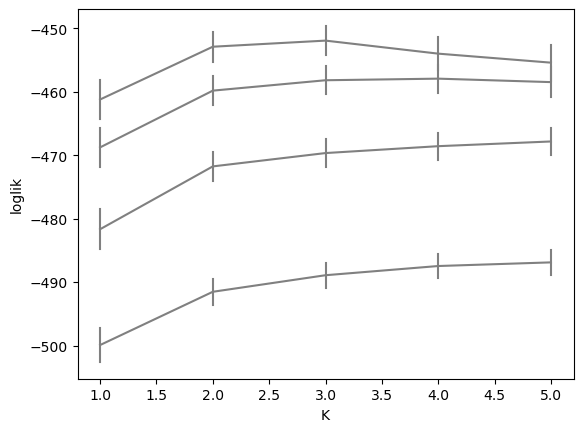

In [16]:

sns.lineplot(x='K',y='loglik',data=df4[df4['names2']=='Mixture: Gaussian rank=1'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)
sns.lineplot(x='K',y='loglik',data=df4[df4['names2']=='Mixture: Gaussian rank=10'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)
sns.lineplot(x='K',y='loglik',data=df4[df4['names2']=='Mixture: Gaussian rank=25'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)
sns.lineplot(x='K',y='loglik',data=df4[df4['names2']=='Mixture: Gaussian rank=50'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)
sns.lineplot(x='K',y='loglik',data=df4[df4['names2']=='Mixture: Gaussian rank=116'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)

/tmp/ipykernel_162241/3063264981.py:2: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.lineplot(x='K',y='loglik',data=df5[df5['names2']=='Mixture: Complex ACG rank=1'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)
/tmp/ipykernel_162241/3063264981.py:3: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.lineplot(x='K',y='loglik',data=df5[df5['names2']=='Mixture: Complex ACG rank=10'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)
/tmp/ipykernel_162241/3063264981.py:4: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.lineplot(x='K',y='loglik',data=df5[df5['names2']=='Mixture: Complex ACG rank=25'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',l

<Axes: xlabel='K', ylabel='loglik'>

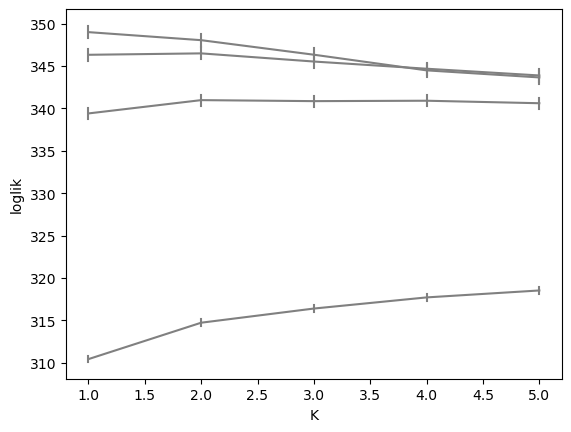

In [17]:
df5 = df4
sns.lineplot(x='K',y='loglik',data=df5[df5['names2']=='Mixture: Complex ACG rank=1'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)
sns.lineplot(x='K',y='loglik',data=df5[df5['names2']=='Mixture: Complex ACG rank=10'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)
sns.lineplot(x='K',y='loglik',data=df5[df5['names2']=='Mixture: Complex ACG rank=25'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)
sns.lineplot(x='K',y='loglik',data=df5[df5['names2']=='Mixture: Complex ACG rank=50'],style='Set',hue='modelname', palette=palette_reduced[0:], linewidth=1.5,err_style='bars',errorbar='se',legend=False)